## **Implemention of The K-nearest Neighbor Algorithm**

---

### **Part 1. Fruit Dataset (Prediction)**

Using fruits' mass and height to predict species of fruit.

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

df = pd.read_table('Dataset/fruit_data_with_colors.txt')
df.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [164]:
df.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

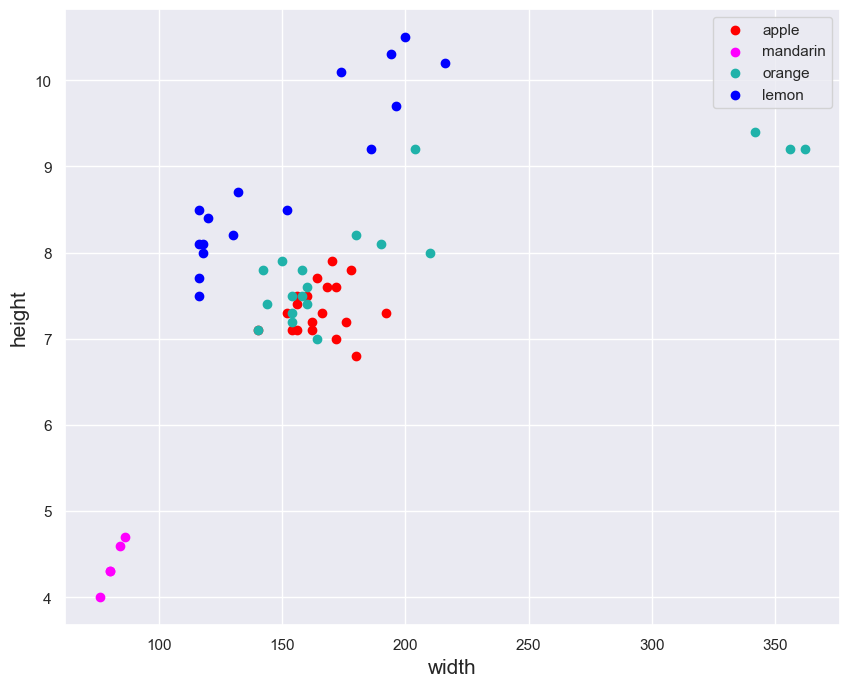

In [165]:
fruit = ["apple", "mandarin", "orange", "lemon"]
colors = ["red", "magenta", "lightseagreen", "blue"]

fig, ax = plt.subplots(figsize = (10, 8))
for fruit, color in zip(fruit, colors):
    temp_df = df[df.fruit_name == fruit]
    ax.scatter(temp_df.mass,
               temp_df.height,
               c = color,
               label = fruit, 
               )
    
ax.set_xlabel("width", fontsize = 15)
ax.set_ylabel("height", fontsize = 15)
ax.legend()
plt.show()

In [166]:
from sklearn.model_selection import train_test_split

X = df[["mass","height"]].to_numpy()

y = df["fruit_name"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.23, 
                                                    random_state=42)

In [167]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 54 is {distance(X[10], X[54])}")

The distance between point 10 and 54 is 50.014397926996985


In [168]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]
k_nearest_neighbors(X_test[-2], X_train, y_train, 5)

[[array([160. ,   7.5]), 'apple', 0.09999999999999964],
 [array([160. ,   7.4]), 'orange', 0.1999999999999993],
 [array([158. ,   7.5]), 'orange', 2.0024984394500787],
 [array([158. ,   7.8]), 'orange', 2.009975124224178],
 [array([162. ,   7.2]), 'apple', 2.0396078054371136]]

In [169]:
y_test[-2] ## True Label

'orange'

In [170]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k
KNN_Predict(X_test[-2], X_train, y_train, 5)

'orange'

In [171]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)
classification_error(X_test, y_test, X_train, y_train, 3)

0.35714285714285715

---

### **Part 2. Audible Dataset (Recommendation)**



In [176]:
df = pd.read_csv('Dataset/Audible_Catlog.csv')
df.head(5)

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0


In [177]:
df.set_index("Book Name", drop = False, inplace = True)
df

,Book Name,Author,Rating,Number of Reviews,Price
Book Name,,,,,
Think Like a Monk: The Secret of How to Harness the Power of Positivity and Be Happy Now,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
Ikigai: The Japanese Secret to a Long and Happy Life,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
Atomic Habits: An Easy and Proven Way to Build Good Habits and Break Bad Ones,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
Life's Amazing Secrets: How to Find Balance and Purpose in Your Life,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0
...,...,...,...,...,...
The Hot Flash Club,The Hot Flash Club,Nancy Thayer,4.3,191.0,1131.0
The Prophet & The Wanderer,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0
Make Today Count: The Secret of Your Success Is Determined by Your Daily Agenda,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0


In [178]:
df.loc["The Hot Flash Club"]

Book Name            The Hot Flash Club
Author                     Nancy Thayer
Rating                              4.3
Number of Reviews                 191.0
Price                            1131.0
Name: The Hot Flash Club, dtype: object

In [179]:
df.columns

Index(['Book Name', 'Author', 'Rating', 'Number of Reviews', 'Price'], dtype='object')

In [181]:
def movie_recommendations(book_name, df, k):
    categories = ['Rating', 
                    'Number of Reviews', 
                    'Price']

    X = df[categories].to_numpy()
    y = df["Book Name"].to_numpy()

    point = df[categories].loc[book_name].to_numpy()
    neighbors = k_nearest_neighbors(point, X, y, k+1)
    return [x[1] for x in neighbors[1:]]

recommendations = movie_recommendations("The Hot Flash Club", df, 5)

print("Audible Book Recommendations")
for i, book in enumerate(recommendations):
    print(f"{i+1}. {book}")

Audible Book Recommendations
1. The Unusual Billionaires
2. The Buddha and the Badass: The Secret Spiritual Art of Succeeding at Work
3. Take Control of Your Life: How to Silence Fear and Win the Mental Game
4. Sochiye Aur Ameer Baniye [Think and Be Rich]
5. Ati Prabhavkari Logon ki 7 Aadatein [7 Habits of Highly Effective People]
